In [13]:
import pod5
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.size'] = 12
from tqdm import tqdm
import sys
import random
from scipy import stats

In [17]:
fig_outpath = '../figures/'

## Figure1C

In [4]:
# pos and neg pod5
neg_nuclei = '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/pod5/220308_ang_0.pod5'
pos_nuclei_500 = '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/pod5/220308_ang_500.pod5'

# sphe chrom pod5
chrom_sphe_500 = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/sphe/220524_500Ang_Spheroblast_dorado.pod5'
# sphe chrom pod5
chrom_nuclei_500 = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/mapping/220331_Nuclei_Ang500.pod5'
chrom_nuclei_210615 = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/mapping/20210615_0802_shelansky_chrom.pod5'
chrom_nuclei_190819 = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/mapping/20190819_chrom.pod5'
chrom_nuclei_190429 = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/mapping/20190429_chrom.pod5'

In [5]:
def fetchSigPod5(mypod5, top_nread= 1000, nsig = 1000):
    signals = []
    c= 0
    with pod5.Reader(mypod5) as reader:
        print(f'total number of reads: {len(reader.read_ids)}')
        for read_record in reader.reads():
            signal = read_record.signal_pa
            random.shuffle(signal)
            signals.extend(signal[:nsig])
            c+=1
            if c == top_nread:
                break
    return signals

In [9]:
pod5s = [neg_nuclei, pos_nuclei_500, chrom_sphe_500, chrom_nuclei_500, chrom_nuclei_190429, chrom_nuclei_210615, chrom_nuclei_190819]

labels = ['negative ctrl', 'positive ctrl', 'spheroplast', 'nuclei rep1', 'nuclei rep2', 'nuclei rep3', 'nuclei rep4']

allsignals = []

for i in range(len(pod5s)):
    mylabel = labels[i]
    print(f'start processing {mylabel}')
    mysignals = fetchSigPod5(pod5s[i])
    allsignals.append(mysignals)
    
    signal_quantile = np.quantile(mysignals, q = [0, 0.25, 0.5, 0.75, 1])
    print(f'{mylabel} signal quantile: {signal_quantile}; signal mean:{np.mean(mysignals)}; signal std:{np.std(mysignals)}')

start processing negative ctrl
total number of reads: 76833
negative ctrl signal quantile: [-764.4130249    74.82449341   86.29256439   97.38463593  778.32507324]; signal mean:86.07902526855469; signal std:15.977696418762207
start processing positive ctrl
total number of reads: 64000
positive ctrl signal quantile: [-131.7244873    71.3194046    82.04553986   92.58349609  768.33013916]; signal mean:81.75645446777344; signal std:15.193473815917969
start processing spheroplast
total number of reads: 18575
spheroplast signal quantile: [-161.56015015   67.87770081   78.16220093   88.82068634  301.0553894 ]; signal mean:77.03917694091797; signal std:17.57735252380371
start processing nuclei rep1
total number of reads: 74895
nuclei rep1 signal quantile: [-140.26274109   60.18672562   69.87194061   79.38421631  709.96124268]; signal mean:69.5262222290039; signal std:13.977203369140625
start processing nuclei rep2
total number of reads: 106766
nuclei rep2 signal quantile: [-213.15751648   73.10

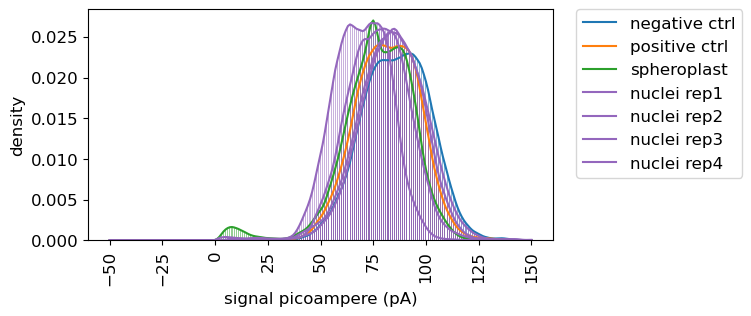

In [24]:
mycolor = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple', 'tab:purple', 'tab:purple', 'tab:purple', 'tab:purple']
plt.figure(figsize=(6, 3))
for i in range(len(allsignals)):
    kde = stats.gaussian_kde(allsignals[i])
    x = np.arange(-50, 151, 1)
    density = kde(x)
    plt.plot(x, density, label=labels[i], color = mycolor[i])
    plt.bar(x, density, color = mycolor[i], alpha=0.5, width = 0.5)
    plt.xticks(np.arange(-50, 151, 25), rotation='vertical')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel('signal picoampere (pA)')
    plt.ylabel('density')
plt.savefig(fig_outpath+ 'Figure1C_all_chrom_signal_distribution.pdf', bbox_inches='tight')

In [25]:
kmerpeaks = {}
for line in open('/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/pod5/220308_ang_500_sig_dist_precalculated_hist.tsv'):
    line = line.rstrip().split('\t')
    hist = [float(x) for x in line[1].split(',')]
    if line[0] not in kmerpeaks: kmerpeaks[line[0]] = [hist]
    else: kmerpeaks[line[0]].append(hist)
for line in open('/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/pod5/220308_ang_0_sig_dist_precalculated_hist.tsv'):
    line = line.rstrip().split('\t')
    hist = [float(x) for x in line[1].split(',')]
    if line[0] not in kmerpeaks: kmerpeaks[line[0]] = [hist]
    else: kmerpeaks[line[0]].append(hist)

In [28]:
from scipy.signal import find_peaks

## Figure1D

2 1


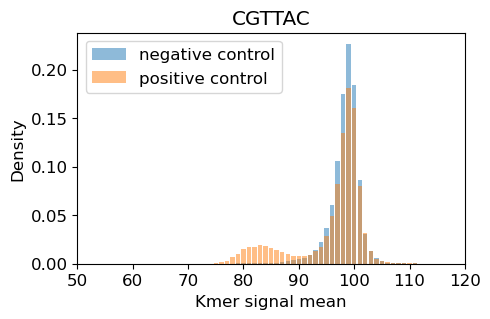

In [63]:
kmer = 'CGTTAC'
pos, neg = kmerpeaks[kmer]
pospeaks, _ = find_peaks(pos, prominence=0.005, distance=5)
negpeaks, _ = find_peaks(neg, prominence=0.005, distance=5)
plt.figure(figsize=(5, 3))
print(len(pospeaks), len(negpeaks))
# plt.plot([x+25 for x in negpeaks], [neg[x] for x in negpeaks], 'x', label='negative peaks', color='tab:blue')
# plt.plot([x+25 for x in pospeaks], [pos[x] for x in pospeaks], 'x', label='positive peaks', color='tab:orange')
plt.bar(range(25,149), neg, width=0.8, label="negative control", alpha=0.5, color='tab:blue')
plt.bar(range(25, 149), pos, width=0.8, label="positive control", alpha=0.5, color='tab:orange')
plt.xlim(50, 120)
plt.xlabel('Kmer signal mean')
plt.ylabel('Density')
plt.title(kmer)
plt.legend()
plt.savefig(fig_outpath+ 'Figure1D_CGTTAC_2_peak.pdf', bbox_inches='tight')

## Figure1E

2 1


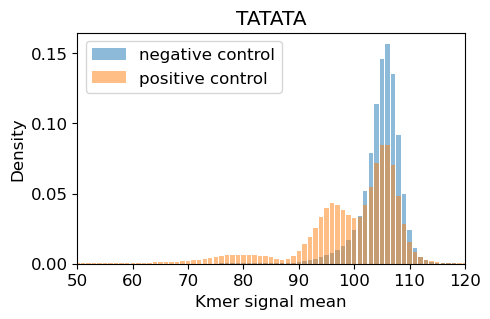

In [64]:
kmer = 'TATATA'
pos, neg = kmerpeaks[kmer]
pospeaks, _ = find_peaks(pos, prominence=0.005, distance=5)
negpeaks, _ = find_peaks(neg, prominence=0.005, distance=5)
plt.figure(figsize=(5, 3))
print(len(pospeaks), len(negpeaks))
# plt.plot([x+25 for x in negpeaks], [neg[x] for x in negpeaks], 'x', label='negative peaks', color='tab:blue')
# plt.plot([x+25 for x in pospeaks], [pos[x] for x in pospeaks], 'x', label='positive peaks', color='tab:orange')
plt.bar(range(25,149), neg, width=0.8, label="negative control", alpha=0.5, color='tab:blue')
plt.bar(range(25, 149), pos, width=0.8, label="positive control", alpha=0.5, color='tab:orange')
plt.xlim(50, 120)
plt.xlabel('Kmer signal mean')
plt.ylabel('Density')
plt.title(kmer)
plt.legend()
plt.savefig(fig_outpath+ 'Figure1E_TATATA_2_peak.pdf', bbox_inches='tight')

## FigureF

1 1


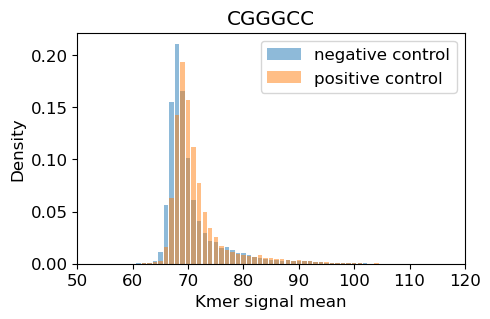

In [65]:
kmer = 'CGGGCC'
pos, neg = kmerpeaks[kmer]
pospeaks, _ = find_peaks(pos, prominence=0.005, distance=5)
negpeaks, _ = find_peaks(neg, prominence=0.005, distance=5)
plt.figure(figsize=(5, 3))
print(len(pospeaks), len(negpeaks))
# plt.plot([x+25 for x in negpeaks], [neg[x] for x in negpeaks], 'x', label='negative peaks', color='tab:blue')
# plt.plot([x+25 for x in pospeaks], [pos[x] for x in pospeaks], 'x', label='positive peaks', color='tab:orange')
plt.bar(range(25,149), neg, width=0.8, label="negative control", alpha=0.5, color='tab:blue')
plt.bar(range(25, 149), pos, width=0.8, label="positive control", alpha=0.5, color='tab:orange')
plt.xlim(50, 120)
plt.xlabel('Kmer signal mean')
plt.ylabel('Density')
plt.title(kmer)
plt.legend()
plt.savefig(fig_outpath+ 'Figure1F_CGGGCC_2_peak.pdf', bbox_inches='tight')

## FigureG

In [54]:
sys.path.insert(0, '/private/groups/brookslab/gabai/tools/NEMO/src/')
from plot import *

In [61]:
def plotMotiffromFile(seqfile, outpath, prefix, seqlen = 9, space=1, title = '', y_lim=''):
    
    A=mplimg.imread('/private/home/gabai/tools/NEMO/img/A.png')
    T=mplimg.imread('/private/home/gabai/tools/NEMO/img/T.png')
    C=mplimg.imread('/private/home/gabai/tools/NEMO/img/C.png')
    G=mplimg.imread('/private/home/gabai/tools/NEMO/img/G.png')
    
    pngList = {'A': A, 'C': C, 'G': G, 'T': T}
    
    motif_dict= {i:{'A':1, 'C':1, 'G':1, 'T':1} for i in range(seqlen)}
    nCount=0
    with open(seqfile, 'r') as infile:
        for line in infile:
            line=line.strip().split('\t')
            nCount+=1
            sequence = line[0]
            for i in range(len(sequence)):
                nt = sequence[i]
                motif_dict[i][nt] +=1
    s = 4
    err = (1/np.log(2))*((s-1)/(2*nCount))
    
    figureWidth=4
    figureHeight=2
    
    plt.figure(figsize=(figureWidth,figureHeight))
    
    panelWidth=1.5
    panelHeight=0.5
    
    panel1 = plt.subplot()
    
    panel1.tick_params(bottom=True, labelbottom=True,
                   left=True, labelleft=True,
                   right=False, labelright=False,
                   top=False, labeltop=False)
    
    panel1.set_xlim(0,seqlen)
    
    panel1.set_xticks(np.arange(0,seqlen+1, space))
    # panel1.set_xlabel(f"Distance to\n {center_name}")
    panel1.set_ylabel("Bits")
    panel1.set_title(title)
    # panel1.axvline(x = 0, color = 'black', linewidth = 0.5)
    
    max_y = 0
    for pos in motif_dict.keys():
        ntCount = list(motif_dict[pos].values())
        totalCount = sum(ntCount)
        freqCount = [nt/totalCount for nt in ntCount]
        entropy = sum([-p*np.log2(p) for p in freqCount])
        colHeight = np.log2(4) - (entropy+err)
        print(entropy, colHeight)
        if colHeight > max_y:
            max_y = colHeight
        height = {nt: freq*colHeight for nt,freq in zip(['A', 'C', 'G', 'T'], freqCount)}
        Sortedheight = dict(sorted(height.items(), key=lambda x:x[1]))
        bottom = 0
        top = 0
        for alphabet in Sortedheight.keys():
            bottom = top
            top = bottom + Sortedheight[alphabet]         #left,right,bottom,top
            panel1.imshow(pngList[alphabet],extent=[pos,pos+1,bottom,top],aspect='auto',origin='upper')
    if not y_lim:
        panel1.set_ylim(0, max_y)
    else:
        panel1.set_ylim(y_lim[0], y_lim[1])
    outfig = os.path.join(outpath, prefix+'_motif.pdf')
    plt.savefig(outfig, bbox_inches='tight')

1.6418395138263389 0.34535550060364084
1.4447774040620285 0.5424176103679512
1.453620008855249 0.5335750055747308
1.9032149607758195 0.08398005365416017
1.9309659512223858 0.05622906320759391
1.96192869617485 0.025266318255129594


<Figure size 500x200 with 0 Axes>

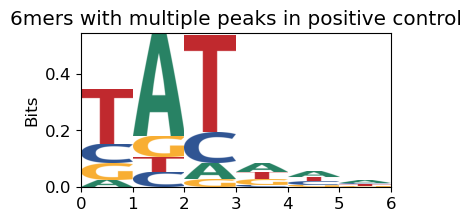

In [62]:
seqfile = '/private/groups/brookslab/gabai/projects/Add-seq/results/240926_angelicin_informative_kmers.tsv'
plotMotiffromFile(seqfile, seqlen=6, outpath=fig_outpath,
                  prefix = 'Figure1G_informative_kmers', title = '6mers with multiple peaks in positive control')